In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
import os
import glob
import json
import pandas as pd

In [47]:
data_path = './ECE219_tweet_data/'

#### Question 27

In [ ]:
for fname in os.listdir(data_path):
    file = []
    with open(os.path.join(data_path,fname),encoding="utf8") as f:
        for line in f:
            file.append(line)
            
    
    num_tweets = len(file)
    time, followers, retweets = [], [], []
    for line in file:
        tweet = json.loads(line)
#         print(tweet['tweet']['text'])
        time += [tweet['citation_date']]
        followers += [tweet['author']['followers']]
        retweets += [tweet['metrics']['citations']['total']]

    print(fname, num_tweets)
    print('Average number of tweets/hr:',num_tweets/((np.max(time)-np.min(time))/3600.))
    print('Average number of followers:',np.mean(followers))
    print('Average number of retweets:',np.mean(retweets))

tweets_#superbowl.txt 1213813
Average number of tweets/hr: 2072.11840170408
Average number of followers: 8814.96799424623
Average number of retweets: 2.3911895819207736
tweets_#patriots.txt 440621
Average number of tweets/hr: 750.89426460689
Average number of followers: 3280.4635616550277
Average number of retweets: 1.7852871288476946
tweets_#sb49.txt 743649
Average number of tweets/hr: 1276.8570598680474
Average number of followers: 10374.160292019487
Average number of retweets: 2.52713444111402
tweets_#gopatriots.txt 23511
Average number of tweets/hr: 40.95469800606194
Average number of followers: 1427.2526051635405
Average number of retweets: 1.4081919101697078
tweets_#nfl.txt 233022
Average number of tweets/hr: 397.0213901819841
Average number of followers: 4662.37544523693
Average number of retweets: 1.5344602655543254
tweets_#gohawks.txt 169122
Average number of tweets/hr: 292.48785062173687
Average number of followers: 2217.9237355281984
Average number of retweets: 2.01320939913

#### Question 28

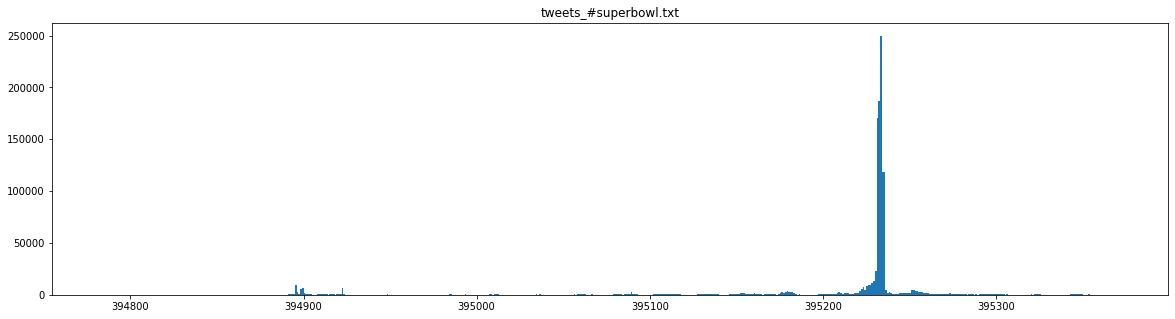

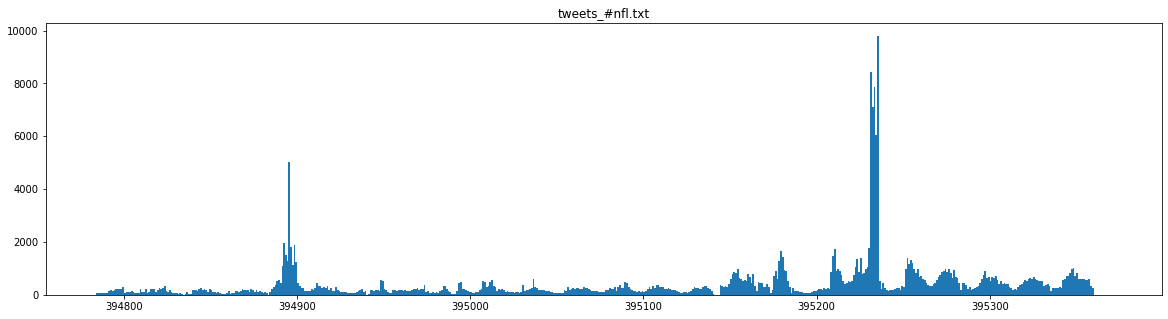

In [ ]:
for fname in ['tweets_#superbowl.txt', 'tweets_#nfl.txt']:
    file = []
    with open(os.path.join(data_path,fname),encoding="utf8") as f:
        for line in f:
            file.append(line)
    time = []
    for line in file:
        tweet = json.loads(line)
        time += [tweet['citation_date']//3600]
    plt.figure(figsize=(20,5))
    plt.hist(time,bins=range(min(time),max(time)+1))
    plt.title(fname)
    plt.show()

#### Data Exploration

In [5]:
train_features =  pd.read_csv('./train_features.csv',lineterminator='\n')
test_features = pd.read_csv('./test_features.csv',lineterminator='\n')

In [7]:
test_features

,Unnamed: 0,time,followers,retweets,ranking_score,impressions,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,0,1.422819e+09,180.0,1.0,4.034830,170.0,0.950291,-0.308799,-0.032223,0.001628,...,0.000204,-0.000146,-0.000084,0.000136,-0.000155,-0.000144,0.000195,0.000116,0.000153,-0.000061
1,1,1.422823e+09,730.0,1.0,4.021128,728.0,0.950291,-0.308799,-0.032223,0.001628,...,0.000204,-0.000146,-0.000084,0.000136,-0.000155,-0.000144,0.000195,0.000116,0.000153,-0.000061
2,2,1.422836e+09,172.0,1.0,4.109626,174.0,0.028737,0.077532,0.138296,-0.082138,...,0.025732,-0.000540,0.044254,0.004780,0.003891,-0.024276,-0.015690,0.002581,0.018465,0.031215
3,3,1.422841e+09,308.0,1.0,4.014885,314.0,0.016870,0.048615,0.067485,0.008780,...,-0.001037,-0.000602,-0.003414,-0.004251,0.003579,0.006936,-0.000462,-0.008469,-0.002251,-0.003728
4,4,1.422820e+09,45.0,2.0,4.090460,39.0,0.950291,-0.308799,-0.032223,0.001628,...,0.000204,-0.000146,-0.000084,0.000136,-0.000155,-0.000144,0.000195,0.000116,0.000153,-0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564743,564743,1.422833e+09,967.0,1.0,3.676251,971.0,0.021472,0.003888,0.094188,-0.058599,...,0.083812,0.007565,0.015458,0.003446,0.026147,0.001261,0.008434,0.018731,-0.008462,0.013854
564744,564744,1.422661e+09,363628.0,19.0,7.676606,352351.0,0.049330,0.008841,0.060352,-0.026919,...,0.003454,-0.008528,0.008447,-0.036398,-0.048370,0.013139,0.008271,-0.004793,0.009799,-0.009633
564745,564745,1.422819e+09,903.0,4.0,4.832552,862.0,0.689783,0.722325,-0.035487,0.000198,...,0.000056,0.000124,0.000060,-0.000440,0.000260,0.000309,-0.000375,-0.000320,-0.000233,0.000154
564746,564746,1.422820e+09,238.0,1.0,4.013651,241.0,0.950291,-0.308799,-0.032223,0.001628,...,0.000204,-0.000146,-0.000084,0.000136,-0.000155,-0.000144,0.000195,0.000116,0.000153,-0.000061


Text(0.5, 0.98, 'time EDA')

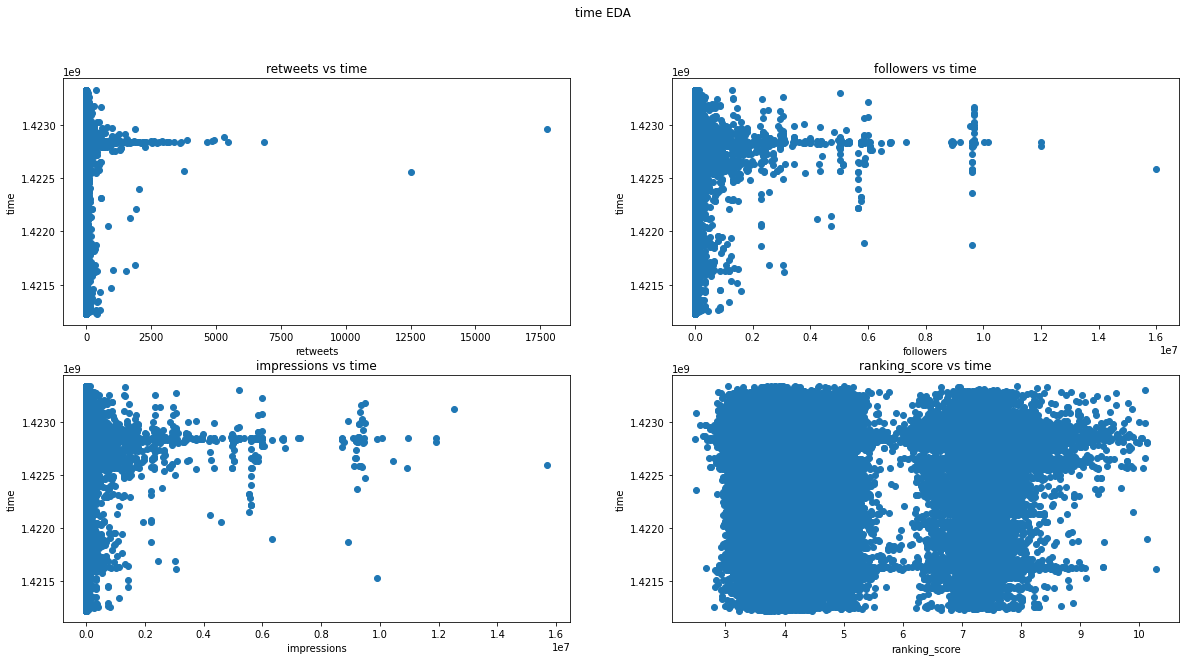

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(test_features['retweets'], test_features['time'])
plt.xlabel('retweets')
plt.ylabel('time')
plt.title('retweets vs time')

plt.subplot(222)
plt.scatter(test_features['followers'], test_features['time'])
plt.xlabel('followers')
plt.ylabel('time')
plt.title('followers vs time')

plt.subplot(223)
plt.scatter(test_features['impressions'], test_features['time'])
plt.xlabel('impressions')
plt.ylabel('time')
plt.title('impressions vs time')

plt.subplot(224)
plt.scatter(test_features['ranking_score'], test_features['time'])
plt.xlabel('ranking_score')
plt.ylabel('time')
plt.title('ranking_score vs time')

plt.suptitle('time EDA')

Text(0.5, 0.98, 'retweet EDA')

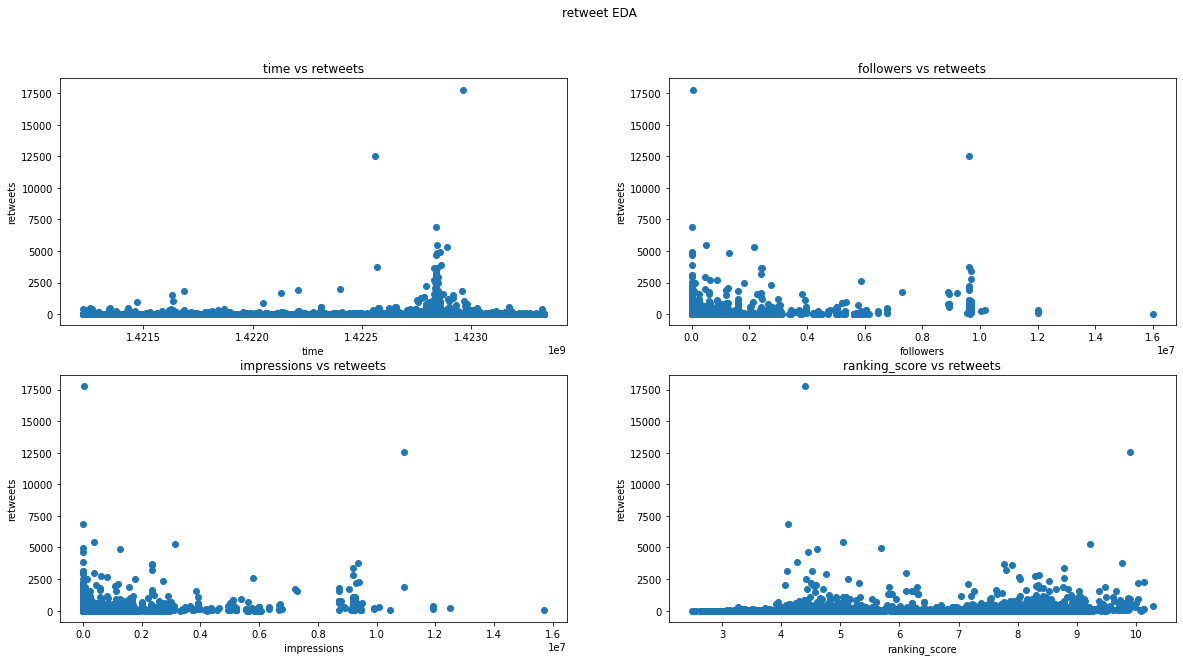

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(test_features['time'], test_features['retweets'])
plt.xlabel('time')
plt.ylabel('retweets')
plt.title('time vs retweets')

plt.subplot(222)
plt.scatter(test_features['followers'], test_features['retweets'])
plt.xlabel('followers')
plt.ylabel('retweets')
plt.title('followers vs retweets')

plt.subplot(223)
plt.scatter(test_features['impressions'], test_features['retweets'])
plt.xlabel('impressions')
plt.ylabel('retweets')
plt.title('impressions vs retweets')

plt.subplot(224)
plt.scatter(test_features['ranking_score'], test_features['retweets'])
plt.xlabel('ranking_score')
plt.ylabel('retweets')
plt.title('ranking_score vs retweets')

plt.suptitle('retweet EDA')

### Features
- time : tweet['citation_date']
- followers : tweet['author']['followers']
- retweets : tweet['metrics']['citations']['total']
- ranking_scores :  tweet['metrics']['ranking_score']
- impressions :  tweet['metrics']['impressions']
- bert sentence embeddings on tweet_text : tweet['tweet']['text']

### Data Preprocessing

In [35]:
os.listdir(data_path)

['tweets_#nfl.txt',
 'tweets_#superbowl.txt',
 'tweets_#sb49.txt',
 'tweets_#patriots.txt',
 'tweets_#gohawks.txt',
 'tweets_#gopatriots.txt']

In [39]:
import os
import json
dictionary_list = []

def clean_text(text, hashtags):    
    for hashtag in hashtags:
        text = text.replace('#' + hashtag,'')
    return text.strip()

tweet_texts = []
for fname in ['tweets_#superbowl.txt']:
    name  = fname[7:-4]
    file = []
    with open(os.path.join(data_path,fname),encoding="utf8") as f:
        for line in f:
            file.append(line)
    print(name)
    for line in file:
        tweet = json.loads(line)
        hashtags = [hashtag_dict['text'] for hashtag_dict in tweet['tweet']['entities']['hashtags']]
        text = tweet['tweet']['text']
        cleaned_text = clean_text(text, hashtags).split()
        tweet_texts += [cleaned_text]

        hashtags = tweet['tweet']['entities']['hashtags']
        hashtag1 = sum([hashtag['indices'][0] for hashtag in hashtags])
        hashtag2 = sum([hashtag['indices'][1] for hashtag in hashtags])
        url = tweet['url']
        # retrieve tweet metrics
        time = tweet['citation_date']
        followers = tweet['author']['followers']
        retweets = tweet['metrics']['citations']['total']
        ranking_score =  tweet['metrics']['ranking_score']
        impressions =  tweet['metrics']['impressions']
        dictionary_data = {'time':time, 'followers':followers,'retweets':retweets, 'ranking_score':ranking_score,'impressions':impressions,'num_hashtags':len(hashtags), 'hashtag1':hashtag1, 'hashtag2':hashtag2, 'tweet_text':cleaned_text, 'url':url}
        dictionary_list.append(dictionary_data)
        if len(dictionary_list) % 100000 ==0:
            print(len(dictionary_list))

#superbowl
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [48]:
df = pd.DataFrame.from_dict(dictionary_list)

Index([         'time',     'followers',      'retweets', 'ranking_score',
         'impressions',  'num_hashtags',      'hashtag1',      'hashtag2',
          'tweet_text',           'url',               0,               1,
                     2,               3,               4,               5,
                     6,               7,               8,               9,
                    10,              11,              12,              13,
                    14,              15,              16,              17,
                    18,              19,              20,              21,
                    22,              23,              24],
      dtype='object')

In [43]:
from fse import Vectors, Average, IndexedList

vecs = Vectors.from_pretrained("glove-twitter-25")
model = Average(vecs)
sentences = tweet_texts
model.train(IndexedList(sentences))

Downloading:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/119M [00:00<?, ?B/s]

(1201919, 6843549)

In [44]:
df_new = pd.concat([df, pd.DataFrame(model.sv.vectors)], axis=1)
df_new.columns

(1213813, 25)

In [52]:
df_new.to_csv('./superbowl_features.csv')

In [54]:
from sklearn.model_selection import train_test_split

df_new = pd.read_csv('./superbowl_features.csv',lineterminator='\n')

train, test = train_test_split(df_new, test_size=0.2, random_state=42)


In [55]:
train

,Unnamed: 0,time,followers,retweets,ranking_score,impressions,num_hashtags,hashtag1,hashtag2,tweet_text,...,15,16,17,18,19,20,21,22,23,24
632652,632652,1422838764,35.0,1,4.273494,33,2,36,59,"['Tied', 'baby!']",...,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
1024338,1024338,1422846294,156.0,1,4.183834,154,1,29,39,"['And', ""that's"", 'why', 'both', 'teams', 'in'...",...,1.993036e-02,-1.299511e-01,-3.788565e-01,-1.116261e-01,-2.710588e-01,-1.762429e-01,4.333353e-01,-3.343302e-03,-5.024344e-01,-2.697193e-01
884170,884170,1422842517,80.0,1,4.187640,79,1,16,26,['AngryNeeson52.'],...,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
662822,662822,1422839228,821.0,1,7.503573,820,2,42,69,"['AGORA', 'VAI', '...', 'http://t.co/atrn2JCvs0']",...,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
933720,933720,1422844210,440.0,2,4.939501,437,1,60,70,"['Anyone', 'else', 'losing', 'their', 'mind', ...",...,2.566857e-01,-8.757507e-03,-4.693837e-01,6.189012e-02,-3.266335e-01,-3.108273e-01,1.906951e-01,3.379076e-01,-1.004939e-01,-4.644691e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,1422555908,330.0,1,4.176391,304,1,0,10,"['tickets.....$8,070', 'lol']",...,7.804301e-01,3.978701e-01,-9.308999e-01,-1.410000e+00,3.262401e-01,1.231100e+00,4.248601e-01,7.066501e-01,7.698501e-01,2.082601e-01
259178,259178,1422829599,27232.0,1,7.242561,27033,6,428,503,"['Im', 'treffen', 'gleich', 'die', 'auf', 'die...",...,-2.072734e-03,6.084273e-01,4.859133e-01,-1.684790e+00,-1.174999e+00,1.792527e-01,1.865587e-01,-5.557249e-01,3.526284e-01,8.930744e-01
131932,131932,1422642249,254.0,1,4.176391,256,2,145,161,"['This', 'is', 'quite', 'possibly', 'the', 'be...",...,3.478038e-01,6.198068e-01,-1.963100e-01,1.190679e-01,-4.589355e-01,-1.026787e-02,2.203342e-01,-1.030308e-01,1.698514e-01,-2.767464e-01
671155,671155,1422839387,111.0,1,4.182061,94,3,95,133,"['Year', 'of', 'the', 'dads.', 'XLIX']",...,-3.636649e-01,4.467101e-01,3.256498e-01,-1.544599e-01,2.445051e-01,-8.262149e-01,1.384751e-01,-2.148349e-01,-6.942099e-01,-1.909864e-01


In [56]:
#%% Defining the data and labels for model fitting for retweet prediction
features = ["time","followers", "ranking_score", "impressions",'num_hashtags','hashtag1', 'hashtag2'] 

toTrain = train[features]
trainLabels = train["retweets"]
toTest = test[features]
testLabels = test["retweets"]


ERROR! Session/line number was not unique in database. History logging moved to new session 247


In [130]:
#%%
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold

#%% Defining the data and labels for model fitting for retweet prediction
retweet_features = ["time","followers", "ranking_score", "impressions",'num_hashtags','hashtag1', 'hashtag2'] 
time_features = ["retweets","followers", "ranking_score", "impressions",'num_hashtags','hashtag1', 'hashtag2'] 
training_dict = {'retweets': retweet_features, 'time': time_features}

for label, features in training_dict.items():
    print(label, features)
    # prep data
    toTrain = train[features]
    trainLabels = train[label]
    toTest = test[features]
    testLabels = test[label]
    # prepare training framework
    ss = StandardScaler()
    X = ss.fit_transform(toTrain)
    y = trainLabels
    param = {'hidden_layer_sizes':[(20,), 
                                (50,),
                                (100,),
                                (200,),
                                (20,20,), 
                                (50,50),
                                (100,100),
                                 ] }
    nn = MLPRegressor()
    clf = GridSearchCV(nn,param,cv=KFold(n_splits=5,shuffle=True),scoring='neg_mean_squared_error',verbose=3)
    # train
    clf.fit(X,y)
    print("Best estimator for "+label+": \n", clf.best_estimator_)
    print("Best score for "+label+": ", -1*clf.best_score_)
    print("Best parameters for "+label+": ", clf.best_params_)

    # save the gridsearch to disk
    filename = './' + label+'_gridsearch.sav'
    pickle.dump(clf, open(filename, 'wb'))

    # some time later...
    # load the model from disk
#     loaded_model = pickle.load(open(filename, 'rb'))


retweets ['time', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......hidden_layer_sizes=(20,);, score=-655.862 total time= 1.2min
[CV 2/5] END .......hidden_layer_sizes=(20,);, score=-929.707 total time= 2.7min
[CV 3/5] END ......hidden_layer_sizes=(20,);, score=-2698.930 total time=  33.4s
[CV 4/5] END ......hidden_layer_sizes=(20,);, score=-2100.466 total time= 1.1min
[CV 5/5] END ......hidden_layer_sizes=(20,);, score=-1593.547 total time= 1.2min
[CV 1/5] END .......hidden_layer_sizes=(50,);, score=-655.543 total time= 1.7min
[CV 2/5] END .......hidden_layer_sizes=(50,);, score=-937.503 total time= 1.7min
[CV 3/5] END ......hidden_layer_sizes=(50,);, score=-2696.750 total time=  29.6s
[CV 4/5] END ......hidden_layer_sizes=(50,);, score=-2097.872 total time= 1.6min
[CV 5/5] END ......hidden_layer_sizes=(50,);, score=-1590.383 total time= 2.2min
[CV 1/5] END ......hidden_l

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END hidden_layer_sizes=(20,);, score=-1978584983478415872.000 total time= 5.0min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END hidden_layer_sizes=(20,);, score=-1982244773929415168.000 total time= 5.6min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END hidden_layer_sizes=(20,);, score=-1970700237459296768.000 total time= 4.3min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END hidden_layer_sizes=(20,);, score=-1973708708659981568.000 total time= 4.6min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END hidden_layer_sizes=(20,);, score=-1985080219125247744.000 total time= 5.8min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END hidden_layer_sizes=(50,);, score=-1935055376630835200.000 total time=11.5min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END hidden_layer_sizes=(50,);, score=-1899330429608312832.000 total time= 7.2min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END hidden_layer_sizes=(50,);, score=-1899663928080587776.000 total time= 8.1min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END hidden_layer_sizes=(50,);, score=-1911021366881988864.000 total time= 8.3min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END hidden_layer_sizes=(50,);, score=-1905859024923261440.000 total time= 7.8min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END hidden_layer_sizes=(100,);, score=-1783047513475545088.000 total time=11.4min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END hidden_layer_sizes=(100,);, score=-1775808577739655680.000 total time=10.5min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END hidden_layer_sizes=(100,);, score=-1805720173265582592.000 total time=13.5min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END hidden_layer_sizes=(100,);, score=-1773116873267745792.000 total time=10.5min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END hidden_layer_sizes=(100,);, score=-1784243912356752896.000 total time=11.6min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END hidden_layer_sizes=(200,);, score=-1600960016530164992.000 total time=21.1min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END hidden_layer_sizes=(200,);, score=-1578180443447232768.000 total time=20.1min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END hidden_layer_sizes=(200,);, score=-1595824666921583104.000 total time=19.4min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END hidden_layer_sizes=(200,);, score=-1606369462366693632.000 total time=21.1min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END hidden_layer_sizes=(200,);, score=-1608852136708598528.000 total time=21.0min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END hidden_layer_sizes=(20, 20);, score=-177730853351.220 total time= 8.3min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END hidden_layer_sizes=(20, 20);, score=-400979572146.812 total time= 8.1min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END hidden_layer_sizes=(20, 20);, score=-259913467003.211 total time= 7.0min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END hidden_layer_sizes=(20, 20);, score=-4550001407911.655 total time= 8.1min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END hidden_layer_sizes=(20, 20);, score=-829542054319.500 total time= 6.9min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END hidden_layer_sizes=(50, 50);, score=-77013735533.237 total time=26.2min


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END hidden_layer_sizes=(50, 50);, score=-76269847418.818 total time=23.3min
[CV 3/5] END hidden_layer_sizes=(50, 50);, score=-169172414547.830 total time=22.5min
[CV 4/5] END hidden_layer_sizes=(50, 50);, score=-8877951695709.168 total time=17.8min
[CV 5/5] END hidden_layer_sizes=(50, 50);, score=-76996826387.331 total time=17.3min
[CV 1/5] END hidden_layer_sizes=(100, 100);, score=-75715139990.065 total time=43.9min
[CV 2/5] END hidden_layer_sizes=(100, 100);, score=-76790553792.947 total time=75.8min
[CV 3/5] END hidden_layer_sizes=(100, 100);, score=-130460589378.616 total time=37.6min
[CV 4/5] END hidden_layer_sizes=(100, 100);, score=-7950106639644.657 total time=45.7min
[CV 5/5] END hidden_layer_sizes=(100, 100);, score=-75960292638.943 total time=54.6min
Best estimator for time: 
 MLPRegressor(hidden_layer_sizes=(20, 20))
Best score for time:  1243633470946.48
Best parameters for time:  {'hidden_layer_sizes': (20, 20)}


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [136]:
hidden_layer_sizes=[(20,), 
                    (50,),
                    (100,),
                    (200,),
                    (20,20,), 
                    (50,50),
                    (100,100),
                     ]

### Retweets

In [260]:
clf = pickle.load(open('./retweets_gridsearch.sav', 'rb'))
label = 'retweets'
print("Best estimator for "+label+": \n", clf.best_estimator_)
print("Best score for "+label+": ", -1*clf.best_score_)
print("Best parameters for "+label+": ", clf.best_params_)

Best estimator for retweets: 
 MLPRegressor()
Best score for retweets:  1591.7575782977879
Best parameters for retweets:  {'hidden_layer_sizes': (100,)}


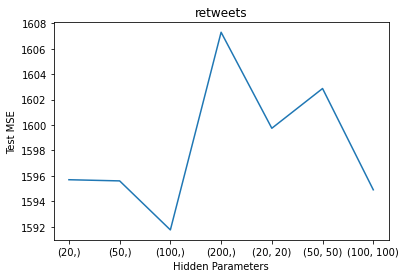

In [261]:
plt.figure()
plt.plot(range(len(hidden_layer_sizes)), -1*clf.cv_results_['mean_test_score'])
ax = plt.gca()
plt.xticks(range(len(hidden_layer_sizes)), [str(i) for i in hidden_layer_sizes])
plt.ylabel('Test MSE')
plt.xlabel('Hidden Parameters')
plt.title(label)
plt.show()

In [269]:
nn = clf.best_estimator_

features = training_dict[label]
print(label, features)
# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
nn = MLPRegressor(hidden_layer_sizes= (100,))
nn.fit(toTrain,trainLabels)

# predict
X_test = ss.fit_transform(toTest)
y_pred = nn.predict(X_test)

print(label + ' nn test MSE:', mean_squared_error(testLabels,y_pred))

retweets ['time', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']


/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


retweets nn test MSE: 690.7681096765979


Text(0.5, 1.0, 'retweets 100 nn correlation plot')

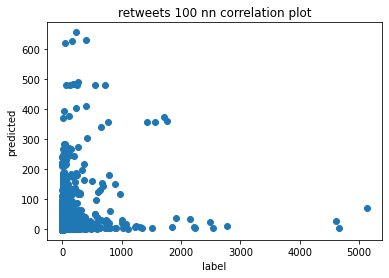

In [277]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
# plt.xlim(min(testLabels.values),max(testLabels.values))
# plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' 100 nn correlation plot')

In [278]:
features = training_dict[label]
print(label, features)
# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
nn = MLPRegressor(hidden_layer_sizes= (10,))
nn.fit(toTrain,trainLabels)

# predict
X_test = ss.fit_transform(toTest)
y_pred = nn.predict(X_test)

print(label + ' nn test MSE:', mean_squared_error(testLabels,y_pred))

retweets ['time', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']
retweets nn test MSE: 696.153928009655


/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'retweets10 nn correlation plot')

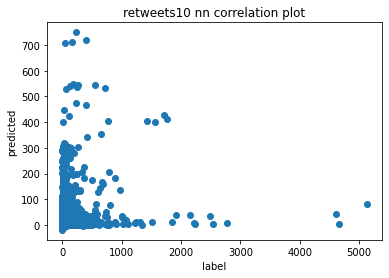

In [279]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
# plt.xlim(min(testLabels.values),max(testLabels.values))
# plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + '10 nn correlation plot')

In [265]:
from sklearn.linear_model import LinearRegression

# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
reg = LinearRegression().fit(toTrain, trainLabels)


# predict
y_pred = reg.predict(toTest)

print(label + ' linear regression test MSE:', mean_squared_error(testLabels,y_pred))

retweets linear regression test MSE: 705.6724949895731


Text(0.5, 1.0, 'retweets linear regression correlation plot')

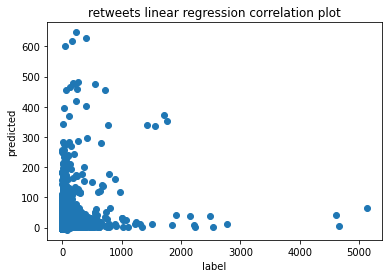

In [272]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
# plt.xlim(min(testLabels.values),max(testLabels.values))
# plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' linear regression correlation plot')

In [273]:
from sklearn.linear_model import Ridge
features = training_dict[label]
print(label, features)

# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
ridge = Ridge(alpha=1.0).fit(toTrain, trainLabels)


# predict
y_pred = ridge.predict(toTest)

print(label + ' ridge regression test MSE:', mean_squared_error(testLabels,y_pred))

retweets ['time', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']
retweets ridge regression test MSE: 705.6724507603061


Text(0.5, 1.0, 'retweets ridge regression correlation plot')

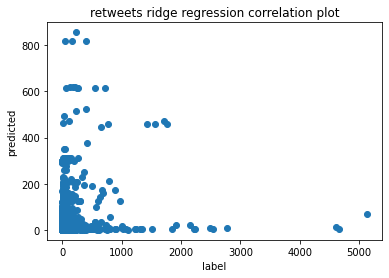

In [274]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
# plt.xlim(min(testLabels.values),max(testLabels.values))
# plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' ridge regression correlation plot')

### Time

In [280]:
clf = pickle.load(open('./time_gridsearch.sav', 'rb'))
label = 'time'
print("Best estimator for "+label+": \n", clf.best_estimator_)
print("Best score for "+label+": ", -1*clf.best_score_)
print("Best parameters for "+label+": ", clf.best_params_)

Best estimator for time: 
 MLPRegressor(hidden_layer_sizes=(20, 20))
Best score for time:  1243633470946.48
Best parameters for time:  {'hidden_layer_sizes': (20, 20)}


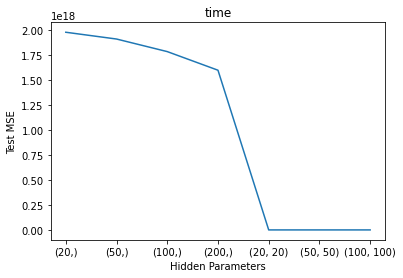

In [281]:
plt.figure()
plt.plot(range(len(hidden_layer_sizes)), -1*clf.cv_results_['mean_test_score'])
ax = plt.gca()
plt.xticks(range(len(hidden_layer_sizes)), [str(i) for i in hidden_layer_sizes])
plt.ylabel('Test MSE')
plt.xlabel('Hidden Parameters')
plt.title(label)
plt.show()

In [290]:
nn = clf.best_estimator_
features = training_dict[label]
print(label, features)

# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
nn = MLPRegressor(hidden_layer_sizes= (20, 20))
nn.fit(toTrain,trainLabels)

time ['retweets', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 20))

In [291]:
# predict
X_test = ss.fit_transform(toTest)
y_pred = nn.predict(X_test)

print(label + ' (20,20) nn test MSE:', mean_squared_error(testLabels,y_pred))

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


time (20,20) nn test MSE: 74557116956.07092


Text(0.5, 1.0, 'time (20,20) nn correlation plot')

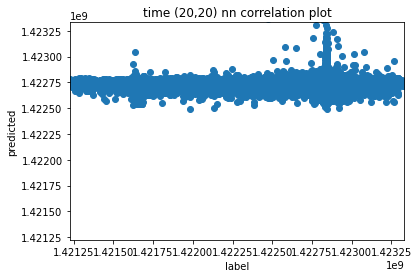

In [292]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
plt.xlim(min(testLabels.values),max(testLabels.values))
plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' (20,20) nn correlation plot')

In [293]:
features = training_dict[label]
print(label, features)

# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
nn = MLPRegressor(hidden_layer_sizes= (10,))
nn.fit(toTrain,trainLabels)

time ['retweets', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,))

In [297]:
# predict
X_test = toTest
y_pred = nn.predict(X_test)

print(label + ' 10 nn test MSE:', mean_squared_error(testLabels,y_pred))

time 10 nn test MSE: 1.9872063718381125e+18


Text(0.5, 1.0, 'time (10) nn correlation plot')

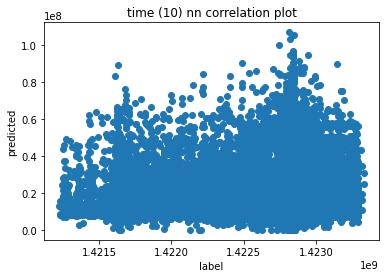

In [298]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
# plt.xlim(min(testLabels.values),max(testLabels.values))
# plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' (10) nn correlation plot')

In [256]:
from sklearn.linear_model import LinearRegression

# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
reg = LinearRegression().fit(toTrain, trainLabels)

# predict
y_pred = reg.predict(toTest)

print(label + ' linear regression test MSE:', mean_squared_error(testLabels,y_pred))

time linear regression test MSE: 74066028120.02184


Text(0.5, 1.0, 'time linear regression correlation plot')

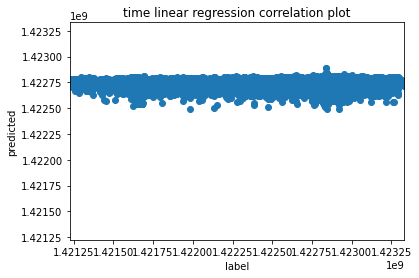

In [257]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
plt.xlim(min(testLabels.values),max(testLabels.values))
plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' linear regression correlation plot')

In [258]:
from sklearn.linear_model import Ridge
features = training_dict[label]
print(label, features)

# prep data
toTrain = ss.fit_transform(train[features])
trainLabels = train[label]
toTest = ss.fit_transform(test[features])
testLabels = test[label]

# train
ridge = Ridge(alpha=1.0).fit(toTrain, trainLabels)


# predict
y_pred = ridge.predict(toTest)

print(label + ' ridge regression test MSE:', mean_squared_error(testLabels,y_pred))

time ['retweets', 'followers', 'ranking_score', 'impressions', 'num_hashtags', 'hashtag1', 'hashtag2']
time ridge regression test MSE: 74066026580.47653


Text(0.5, 1.0, 'time ridge regression correlation plot')

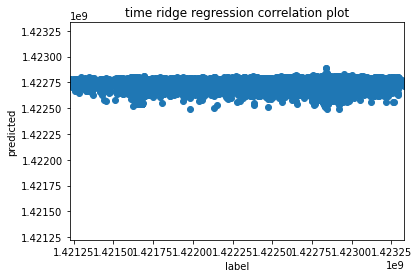

In [259]:
plt.scatter(testLabels.values,y_pred)
plt.xlabel('label')
plt.ylabel('predicted')
plt.xlim(min(testLabels.values),max(testLabels.values))
plt.ylim(min(testLabels.values),max(testLabels.values))
plt.title(label + ' ridge regression correlation plot')

In [120]:
X = ss.fit_transform(toTrain)
y = trainLabels.values
print(type(X),X.shape,type(y),y.shape)


<class 'numpy.ndarray'> (971050, 7) <class 'numpy.ndarray'> (971050,)


In [121]:
hidden_layer_sizes

[(20,), (20, 20), (50,), (50, 50), (100,)]

In [119]:
nn = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes)
nn.fit(X,y)

(array([[ 0.27871763, -0.05640278, -0.25068555, ..., -0.08462103,
         -0.68858353, -0.62392309],
        [ 0.30601724, -0.05562076, -0.32987374, ..., -0.75583963,
         -0.75173612, -0.78688565],
        [ 0.29232393, -0.05611195, -0.32651218, ..., -0.75583963,
         -0.86901952, -0.89281132],
        ...,
        [-0.43373684, -0.05498739, -0.33644705, ..., -0.08462103,
          0.29479263,  0.20718597],
        [ 0.28097628, -0.0559116 , -0.33143956, ...,  0.58659757,
         -0.15629735, -0.02096161],
        [-0.55629866,  0.07206168, -0.36251827, ..., -0.08462103,
         -0.62543093, -0.58318245]]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [123]:
ss = StandardScaler()
X = ss.fit_transform(toTrain)
X_test = ss.fit_transform(toTest)
y_pred = nn.predict(X_test)
hidden_layer_sizes = [(20,), 
                    (50,),
                    (100,),
                    (200,),
                    (20,20,), 
                    (50,50),
                    (100,100),
                    (200,200),
                     ]

for size in hidden_layer_sizes:
    nn = MLPRegressor(hidden_layer_sizes=size)
    nn.fit(X,trainLabels.values)
    y_pred = nn.predict(X_test)
    print(size,'test MSE:', mean_squared_error(testLabels,y_pred))

(20,) test MSE: 700.7955871439865
(50,) test MSE: 691.9274386872385
(100,) test MSE: 701.6490860158946
(200,) test MSE: 697.6134444324123
(20, 20) test MSE: 688.0304296388126
(50, 50) test MSE: 686.8464051325377
(100, 100) test MSE: 686.074740891023


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

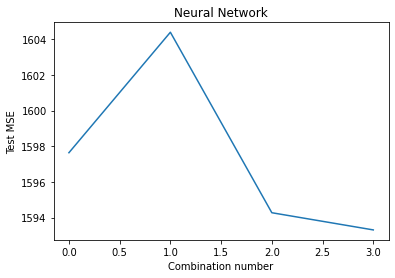

In [94]:
#%%

import matplotlib.pyplot as plt
plt.figure()
plt.plot(-1*clf.cv_results_['mean_test_score'])
plt.xlabel("Combination number"); plt.ylabel('Test MSE'); plt.title('Neural Network')
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error
test_pred = clf.best_estimator_.predict(ss.fit_transform(toTest))
print(mean_squared_error(testLabels,test_pred))

689.6481911955568


In [44]:
dictionary_list = []
for fname in ['tweets_#superbowl.txt']:
    name  = fname[7:-4]
    file = []
    with open(os.path.join(data_path,fname),encoding="utf8") as f:
        for line in f:
            file.append(line)
    print(name)
    for line in file:
        tweet = json.loads(line)
        hashtags = tweet['tweet']['entities']['hashtags']
        hashtag1 = sum([hashtag['indices'][0] for hashtag in hashtags])
        hashtag2 = sum([hashtag['indices'][1] for hashtag in hashtags])
        url = tweet['url']
        # retrieve tweet metrics
        time = tweet['citation_date']
        followers = tweet['author']['followers']
        retweets = tweet['metrics']['citations']['total']
        ranking_score =  tweet['metrics']['ranking_score']
        impressions =  tweet['metrics']['impressions']
        tweet_text = tweet['tweet']['text']
        dictionary_data = {'time':time, 'followers':followers,'retweets':retweets, 'ranking_score':ranking_score,'impressions':impressions,'num_hashtags':len(hashtags), 'hashtag1':hashtag1, 'hashtag2':hashtag2, 'tweet_text':tweet_text, 'url':url}
        dictionary_list.append(dictionary_data)
        if len(dictionary_list) % 100000 ==0:
            print(len(dictionary_list))

KeyboardInterrupt: 

In [37]:
df = pd.DataFrame.from_dict(dictionary_list)
df

,time,followers,retweets,ranking_score,impressions,num_hashtags,hashtag1,hashtag2,tweet_text,url
0,1421468497,22.0,2,3.229207,5,7,466.0,537.0,At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,http://twitter.com/HawksNationYes/status/54965...
1,1421467579,22.0,15,4.033474,4,6,317.0,374.0,You been 12ed pass it on #SeahawkNation #LOB #...,http://twitter.com/brygarza/status/55158539355...
2,1421266957,858.0,2,6.944451,833,5,254.0,301.0,27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,http://twitter.com/gatinhodakaty02/status/5516...
3,1421261298,14335.0,2,6.660640,13943,4,247.0,306.0,Check out the cool event that #budlight has p...,http://twitter.com/BlinkEventsDSM/status/55292...
4,1421316031,1143.0,7,3.856183,1101,2,102.0,121.0,Lenny Kravitz acompañará a Katy Perry en el #H...,http://twitter.com/KatyCat_Prism_/status/55433...
...,...,...,...,...,...,...,...,...,...,...
1213808,1423328580,297.0,1,3.799734,256,3,337.0,360.0,Look at this crazy map of all the private jets...,http://twitter.com/SunTimesPHX/status/56410707...
1213809,1423330066,1759.0,1,4.025752,923,3,292.0,328.0,Where to start making money online for beginne...,http://twitter.com/Jane_Michaels98/status/5641...
1213810,1423330744,69827.0,5,5.163357,78371,7,395.0,456.0,Still in superbowl mode 🏈🏈🏈\n#SB49 #superbowl ...,http://twitter.com/IrynaIvanova/status/5641161...
1213811,1423331367,1085.0,1,3.046343,1051,5,267.0,320.0,"@pscgt2015 Nice, Debbie! @futieton #SB49 #phx ...",http://twitter.com/PaulLopezPR/status/56411875...


In [47]:
tweet

{'firstpost_date': 1419883838,
 'title': 'At http://t.co/Vd0RWOeAed -- #Seahawks #12thMAN #12 #SeahawkNation #SuperBowlBound #Superbowl #Repeat #GoHawks ... http://t.co/XSEFUKqEhN',
 'url': 'http://twitter.com/HawksNationYes/status/549658771749101568',
 'tweet': {'contributors': None,
  'truncated': False,
  'text': 'At http://t.co/Vd0RWOeAed -- #Seahawks #12thMAN #12 #SeahawkNation #SuperBowlBound #Superbowl #Repeat #GoHawks ... http://t.co/XSEFUKqEhN',
  'in_reply_to_status_id': None,
  'id': 549658771749101568,
  'favorite_count': 0,
  'source': '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>',
  'retweeted': False,
  'coordinates': None,
  'timestamp_ms': '1419883838008',
  'entities': {'symbols': [],
   'media': [{'expanded_url': 'http://twitter.com/HawksNationYes/status/549658771749101568/photo/1',
     'sizes': {'large': {'h': 640, 'resize': 'fit', 'w': 640},
      'small': {'h': 340, 'resize': 'fit', 'w': 340},
      'medium': {'h': 600, 'resize': 'fit', 'w': 600},
      '

Text(0.5, 0.98, 'retweet EDA')

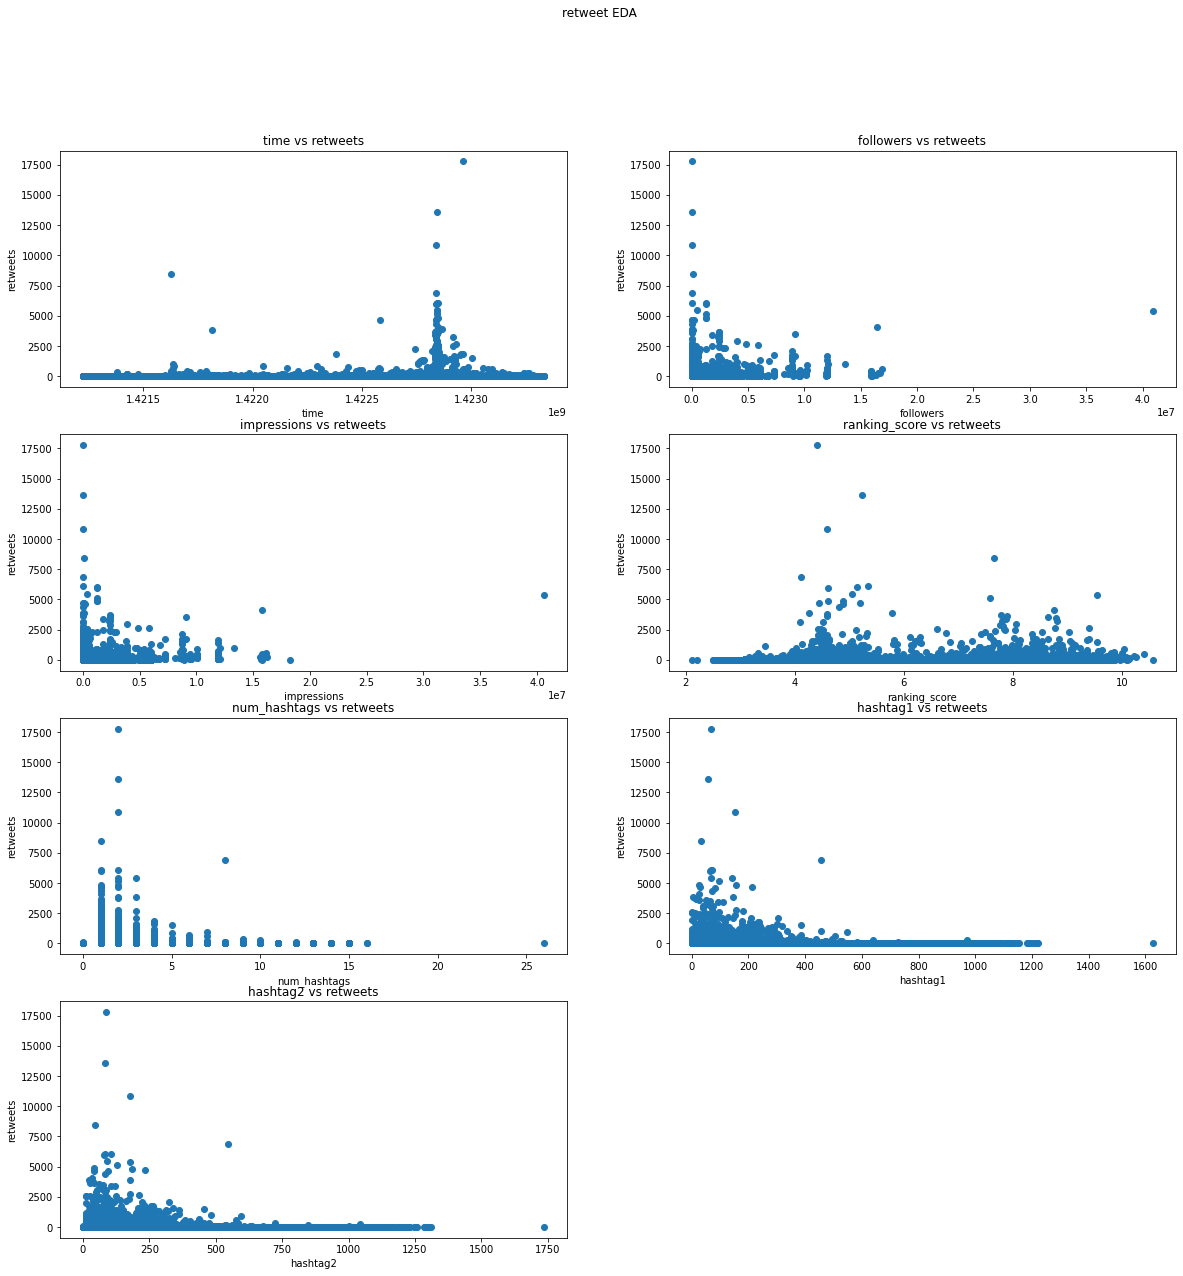

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(421)
plt.scatter(df['time'], df['retweets'])
plt.xlabel('time')
plt.ylabel('retweets')
plt.title('time vs retweets')

plt.subplot(422)
plt.scatter(df['followers'], df['retweets'])
plt.xlabel('followers')
plt.ylabel('retweets')
plt.title('followers vs retweets')

plt.subplot(423)
plt.scatter(df['impressions'], df['retweets'])
plt.xlabel('impressions')
plt.ylabel('retweets')
plt.title('impressions vs retweets')

plt.subplot(424)
plt.scatter(df['ranking_score'], df['retweets'])
plt.xlabel('ranking_score')
plt.ylabel('retweets')
plt.title('ranking_score vs retweets')

plt.subplot(425)
plt.scatter(df['num_hashtags'], df['retweets'])
plt.xlabel('num_hashtags')
plt.ylabel('retweets')
plt.title('num_hashtags vs retweets')

plt.subplot(426)
plt.scatter(df['hashtag1'], df['retweets'])
plt.xlabel('hashtag1')
plt.ylabel('retweets')
plt.title('hashtag1 vs retweets')

plt.subplot(427)
plt.scatter(df['hashtag2'], df['retweets'])
plt.xlabel('hashtag2')
plt.ylabel('retweets')
plt.title('hashtag2 vs retweets')

plt.suptitle('retweet EDA')

Text(0.5, 0.98, 'time EDA')

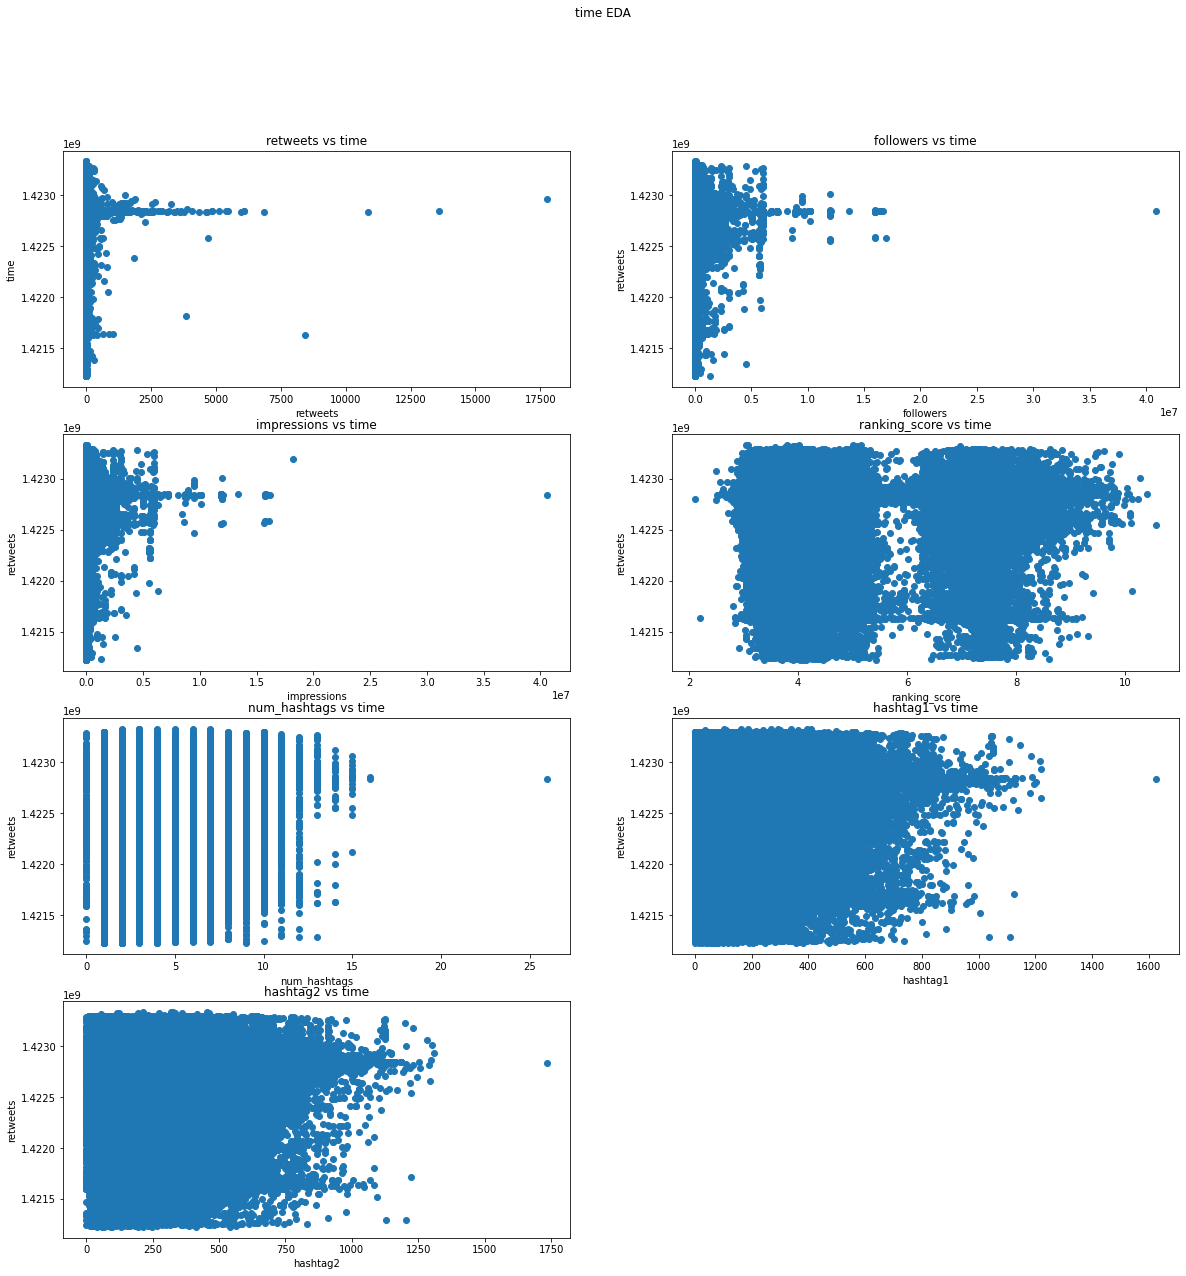

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(421)
plt.scatter(df['retweets'], df['time'])
plt.xlabel('retweets')
plt.ylabel('time')
plt.title('retweets vs time')

plt.subplot(422)
plt.scatter(df['followers'], df['time'])
plt.xlabel('followers')
plt.ylabel('retweets')
plt.title('followers vs time')

plt.subplot(423)
plt.scatter(df['impressions'], df['time'])
plt.xlabel('impressions')
plt.ylabel('retweets')
plt.title('impressions vs time')

plt.subplot(424)
plt.scatter(df['ranking_score'], df['time'])
plt.xlabel('ranking_score')
plt.ylabel('retweets')
plt.title('ranking_score vs time')

plt.subplot(425)
plt.scatter(df['num_hashtags'], df['time'])
plt.xlabel('num_hashtags')
plt.ylabel('retweets')
plt.title('num_hashtags vs time')

plt.subplot(426)
plt.scatter(df['hashtag1'], df['time'])
plt.xlabel('hashtag1')
plt.ylabel('retweets')
plt.title('hashtag1 vs time')

plt.subplot(427)
plt.scatter(df['hashtag2'], df['time'])
plt.xlabel('hashtag2')
plt.ylabel('retweets')
plt.title('hashtag2 vs time')

plt.suptitle('time EDA')

Text(0.5, 1.0, 'hashtag2 vs time')

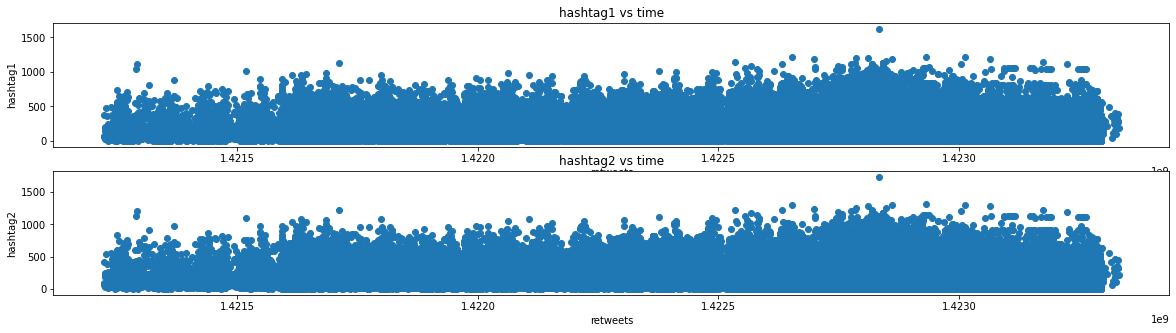

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(211)
plt.scatter( df['time'], df['hashtag1'])
plt.ylabel('hashtag1')
plt.xlabel('retweets')
plt.title('hashtag1 vs time')

plt.subplot(212)
plt.scatter( df['time'],df['hashtag2'])
plt.ylabel('hashtag2')
plt.xlabel('retweets')
plt.title('hashtag2 vs time')


In [ ]:
df_final.to_csv('./sb_49.csv')

In [31]:
import pickle
with open('train_tfidf.pickle', 'wb') as handle:
    pickle.dump(train_tfidf,handle)
with open('test_tfidf.pickle', 'wb') as handle:
    pickle.dump(test_tfidf,handle)

In [32]:
from sklearn.decomposition import TruncatedSVD
lsi = TruncatedSVD(n_components=50,random_state = 42)
lsiTrain = lsi.fit_transform(train_tfidf)
lsiTest = lsi.transform(test_tfidf)

In [57]:
x = train[["time","followers","retweets", "ranking_score", "impressions"]].to_numpy()
x.shape, train_tfidf

((2258990, 5), <2258990x106469 sparse matrix of type '<class 'numpy.float64'>'
 	with 16513828 stored elements in Compressed Sparse Row format>)

In [1]:
# new_train = 
x = train[["time","followers","retweets", "ranking_score", "impressions"]].to_numpy()
new_train = np.concatenate([x, train_tfidf.toarray()],axis=1)

# df = pd.DataFrame(new_train, columns = ["time","followers","retweets", "ranking_score", "impressions"])
# df_final.to_csv('./train.csv')

NameError: ignored

Populating the interactive namespace from numpy and matplotlib


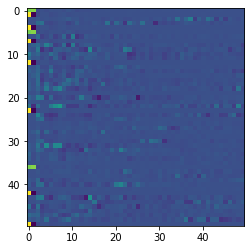

In [38]:
with open('train_tfidf.pickle', 'wb') as handle:
    pickle.dump(lsiTrain,handle)
with open('test_tfidf.pickle', 'wb') as handle:
    pickle.dump(test_tfidf,handle)

In [ ]:
import os
import pandas as pd

def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

for fname in os.listdir(data_path):
    name  = fname[7:-4]
    file = []
    with open(os.path.join(data_path,fname),encoding="utf8") as f:
        for line in f:
            file.append(line)
            
    dictionary_list = []
    for line in file:
        tweet = json.loads(line)
        # retrieve tweet metrics
        time = tweet['citation_date']
        followers = tweet['author']['followers']
        retweets = tweet['metrics']['citations']['total']
        ranking_score =  tweet['metrics']['ranking_score']
        impressions =  tweet['metrics']['impressions']
        # retrieve embeddings from tweet text
        text = tweet['tweet']['text']
        ids = tokenizer.encode(text, return_tensors='pt')
        ids = ids.to(device)
        with torch.no_grad():
            out = model(input_ids=ids)
        hidden_states = out[2]
        last_four_layers = [hidden_states[i] for i in (-1, -2, -3, -4)]
        cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
        cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze().cpu()
        # append to dictionary
        metric_dict = {'followers':followers, 'ranking_score':ranking_score, 'impressions':impressions,'time':time, 'retweets':retweets}
        embedding_dict = {i:k for i,k in enumerate(list(cat_sentence_embedding.numpy()))}
        dictionary_data = Merge(metric_dict,embedding_dict)
        dictionary_list.append(dictionary_data)
        if len(dictionary_list) % 100 ==0:
            print(len(dictionary_list))
    df_final = pd.DataFrame.from_dict(dictionary_list)
    df_final.to_csv('./' + name + '.csv')
#         hashtags = [hashtag_dict['text'] for hashtag_dict in tweet['tweet']['entities']['hashtags']]
#         clean_text = clean_text(text)
        

100
200


KeyboardInterrupt: 

### Predict likes, retweets, time

In [ ]:
tweet

{'firstpost_date': 1423295675,
 'title': 'That’s how you do it. #sb49 #gopatriots',
 'url': 'http://twitter.com/ikazifojuw52/status/563969055279677440',
 'tweet': {'contributors': None,
  'truncated': False,
  'text': 'That’s how you do it. #sb49 #gopatriots',
  'in_reply_to_status_id': None,
  'id': 563969055279677440,
  'favorite_count': 0,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'retweeted': False,
  'coordinates': None,
  'timestamp_ms': '1423295675474',
  'entities': {'symbols': [],
   'user_mentions': [],
   'trends': [],
   'hashtags': [{'indices': [22, 27], 'text': 'sb49'},
    {'indices': [28, 39], 'text': 'gopatriots'}],
   'urls': []},
  'in_reply_to_screen_name': None,
  'in_reply_to_user_id': None,
  'retweet_count': 0,
  'id_str': '563969055279677440',
  'favorited': False,
  'user': {'follow_request_sent': None,
   'profile_use_background_image': True,
   'geo_enabled': False,
   'description': None,
   'verified': False,
   'p

In [ ]:
tweet.keys()

dict_keys(['firstpost_date', 'title', 'url', 'tweet', 'author', 'original_author', 'citation_date', 'metrics', 'highlight', 'type', 'citation_url'])

In [ ]:
tweet['author']

{'author_img': 'http://pbs.twimg.com/profile_images/563968606870835200/y7hm9_wa_normal.png',
 'name': 'Steven Evans',
 'url': 'http://twitter.com/ikazifojuw52',
 'nick': 'ikazifojuw52',
 'followers': 0.0,
 'image_url': 'http://pbs.twimg.com/profile_images/563968606870835200/y7hm9_wa_normal.png',
 'type': 'twitter'}

In [ ]:
tweet['metrics']

{'acceleration': 0,
 'ranking_score': 3.7818537,
 'citations': {'influential': 0,
  'total': 1,
  'data': [{'timestamp': 1422636599, 'citations': 0},
   {'timestamp': 1422636609, 'citations': 0},
   {'timestamp': 1422636619, 'citations': 0},
   {'timestamp': 1422636629, 'citations': 0},
   {'timestamp': 1422636639, 'citations': 0},
   {'timestamp': 1422636649, 'citations': 0},
   {'timestamp': 1422636659, 'citations': 0},
   {'timestamp': 1422636669, 'citations': 0},
   {'timestamp': 1422636679, 'citations': 0},
   {'timestamp': 1422636689, 'citations': 0},
   {'timestamp': 1422636699, 'citations': 0},
   {'timestamp': 1422636709, 'citations': 0}],
  'matching': 1,
  'replies': 0},
 'peak': 0,
 'impressions': 103,
 'momentum': 0}

In [ ]:
tweet['tweet']['entities']

{'symbols': [],
 'user_mentions': [],
 'trends': [],
 'hashtags': [{'indices': [22, 27], 'text': 'sb49'},
  {'indices': [28, 39], 'text': 'gopatriots'}],
 'urls': []}

In [ ]:
text = tweet['tweet']['text']
hashtags = [hashtag_dict['text'] for hashtag_dict in tweet['tweet']['entities']['hashtags']]
print(hashtags)
print(text)
def clean_text(text, hashtags):    
    for hashtag in hashtags:
        text = text.replace('#' + hashtag,'')
    return text.strip()
clean_text(text, hashtags)

['NFL', 'GoHawks']
Holy Moley! Did you see that game? #NFL #GoHawks


'Holy Moley! Did you see that game?'

In [ ]:
hashtags = [hashtag_dict['text'] for hashtag_dict in tweet['tweet']['entities']['hashtags']]
print(hashtags)
text = tweet['tweet']['text']
print(text)
for hashtag in hashtags:
    text = text.replace('#' + hashtag,'')
print(text)

['NFL', 'GoHawks']
Holy Moley! Did you see that game? #NFL #GoHawks
Holy Moley! Did you see that game?  


In [ ]:
tweet['citation_date']

1423295675

In [ ]:
tweet['tweet']['text']

'That’s how you do it. #sb49 #gopatriots'

In [ ]:
a = {k: random.random() for k in range(30)} + {k: random.random() for k in range(30)}

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'